In [117]:
#importing the modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle
import os # Import os to handle file paths
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:

# Load the dataset
df = pd.read_csv("garments_worker_productivity (1).csv")
# Preview the first 5 rows
print("Dataset loaded successfully!")
df

Dataset loaded successfully!


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [119]:
#Visualizing and Analyzing Data (Descriptive Analysis)

In [120]:
# This block checks if the dataset was loaded correctly
# If yes, it prints the number of rows and columns in the dataset
if df is not None:
    print("Shape of the dataset:", df.shape)
else:
    print("Dataset not loaded — cannot check shape.")


Shape of the dataset: (1197, 15)


In [121]:
# This block gives an overview of the dataset, including:
# - Column names and data types
# - Non-null counts (helps identify missing data)
if df is not None:
    print("\nDataset Info:")
    df.info() # Shows structure of the DataFrame
else:
    print("Dataset not loaded — cannot display info.")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   fl

In [122]:
# This block provides basic statistical details for numerical columns only:
# count, mean, standard deviation, min, max, and percentiles
if df is not None:
    print("\nDescriptive Statistics (Numerical Columns):")
    print(df.describe())     # Summarizes stats like mean, std, min, max for numbers
else:
    print("Dataset not loaded — cannot show numerical statistics.")



Descriptive Statistics (Numerical Columns):
              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000

In [123]:
# This block summarizes information for categorical (object-type) columns:
# count, unique values, most frequent value (top), and its frequency
if df is not None:
    print("\nDescriptive Statistics (Categorical Columns):")
    print(df.describe(include='object'))  # Use include='object' to target text columns
else:
    print("Dataset not loaded — cannot show categorical statistics.")



Descriptive Statistics (Categorical Columns):
             date   quarter department        day
count        1197      1197       1197       1197
unique         59         5          3          6
top     3/11/2015  Quarter1     sweing  Wednesday
freq           24       360        691        208


In [124]:
# Checking for Null Values

In [125]:

if df is not None:
    # Show number of missing values in each column
    print("\nNull values in each column:")
    print(df.isnull().sum())
else:
    # Skip if data was not loaded
    print("\nSkipping null value check as dataset failed to load.")



Null values in each column:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [126]:
# Convert 'date' column to datetime and extract month
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Converts strings to datetime format (invalid dates become NaT)
    df['month'] = df['date'].dt.month  # Extracts month as a separate column (1–12)
    df = df.drop('date', axis=1)  # Removes original 'date' column as it's no longer needed
    print("'date' column converted to datetime, month extracted, and 'date' dropped.")
else:
    print("'date' column not found — skipping date processing.")


'date' column converted to datetime, month extracted, and 'date' dropped.


In [127]:
# Clean 'department' column by removing extra space in 'finishing '
if 'department' in df.columns:
    df['department'] = df['department'].replace('finishing ', 'finishing')  # Fix inconsistent category name
    print("Cleaned 'department' column. Unique values:", df['department'].unique())
else:
    print("'department' column not found — skipping department cleaning.")


Cleaned 'department' column. Unique values: ['sweing' 'finishing']


In [128]:
# Drop 'wip' column if it exists — not useful for prediction
if 'wip' in df.columns:
    df = df.drop('wip', axis=1)
    print("'wip' column dropped.")

# Drop 'sl_no' column if it exists — just a serial number
if 'sl_no' in df.columns:
    df = df.drop('sl_no', axis=1)
    print("'sl_no' column dropped.")


'wip' column dropped.


In [129]:
# Show the first few rows to verify cleaning
print("\nPreview after preprocessing:")
print(df.head())



Preview after preprocessing:
    quarter department       day  team  targeted_productivity    smv  \
0  Quarter1     sweing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing  Thursday     1                   0.75   3.94   
2  Quarter1     sweing  Thursday    11                   0.80  11.41   
3  Quarter1     sweing  Thursday    12                   0.80  11.41   
4  Quarter1     sweing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0             0.886

In [130]:
# Check null values after dropping and cleaning
print("\nNull values after cleanup:")
print(df.isnull().sum())


Null values after cleanup:
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
dtype: int64


In [131]:
# Fill missing numeric values with the column's median
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled missing values in '{col}' with median.")


In [132]:
# Fill missing numeric values with the column's median
for col in df.select_dtypes(include='number').columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled missing values in '{col}' with median.")

In [133]:
# Final check for nulls
print("\nNull values after imputation:")
print(df.isnull().sum())




Null values after imputation:
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
dtype: int64


In [134]:
# Handling Categorical Data

In [135]:
# Check if the data is loaded correctly
if df is not None:
    
    # Step 1: List the text (categorical) columns we want to convert
    text_columns = ['quarter', 'department', 'day']

    # Step 2: Remove any columns from the list if they are not found in the dataset
    text_columns = [col for col in text_columns if col in df.columns]

    # Step 3: If we found any text columns to convert
    if text_columns:
        # Apply One-Hot Encoding:
        # This creates new columns for each category using 0 and 1
        # drop_first=True means it will remove the first category to avoid duplicate info
        df = pd.get_dummies(df, columns=text_columns, drop_first=True)
        # Show a success message and a preview of the updated data
        print("One-hot encoding done successfully.")
        print(df.head())  # Show first few rows of updated DataFrame
    
    else:
        # If no text columns were found
        print("No text columns found to encode.")

else:
    # If the dataset was not loaded
    print("Data not loaded — cannot perform encoding.")


One-hot encoding done successfully.
   team  targeted_productivity    smv  over_time  incentive  idle_time  \
0     8                   0.80  26.16       7080         98        0.0   
1     1                   0.75   3.94        960          0        0.0   
2    11                   0.80  11.41       3660         50        0.0   
3    12                   0.80  11.41       3660         50        0.0   
4     6                   0.80  25.90       1920         50        0.0   

   idle_men  no_of_style_change  no_of_workers  actual_productivity  ...  \
0         0                   0           59.0             0.940725  ...   
1         0                   0            8.0             0.886500  ...   
2         0                   0           30.5             0.800570  ...   
3         0                   0           30.5             0.800570  ...   
4         0                   0           56.0             0.800382  ...   

   quarter_Quarter2  quarter_Quarter3  quarter_Quarter4  quart

In [136]:
#Correlation Analysis

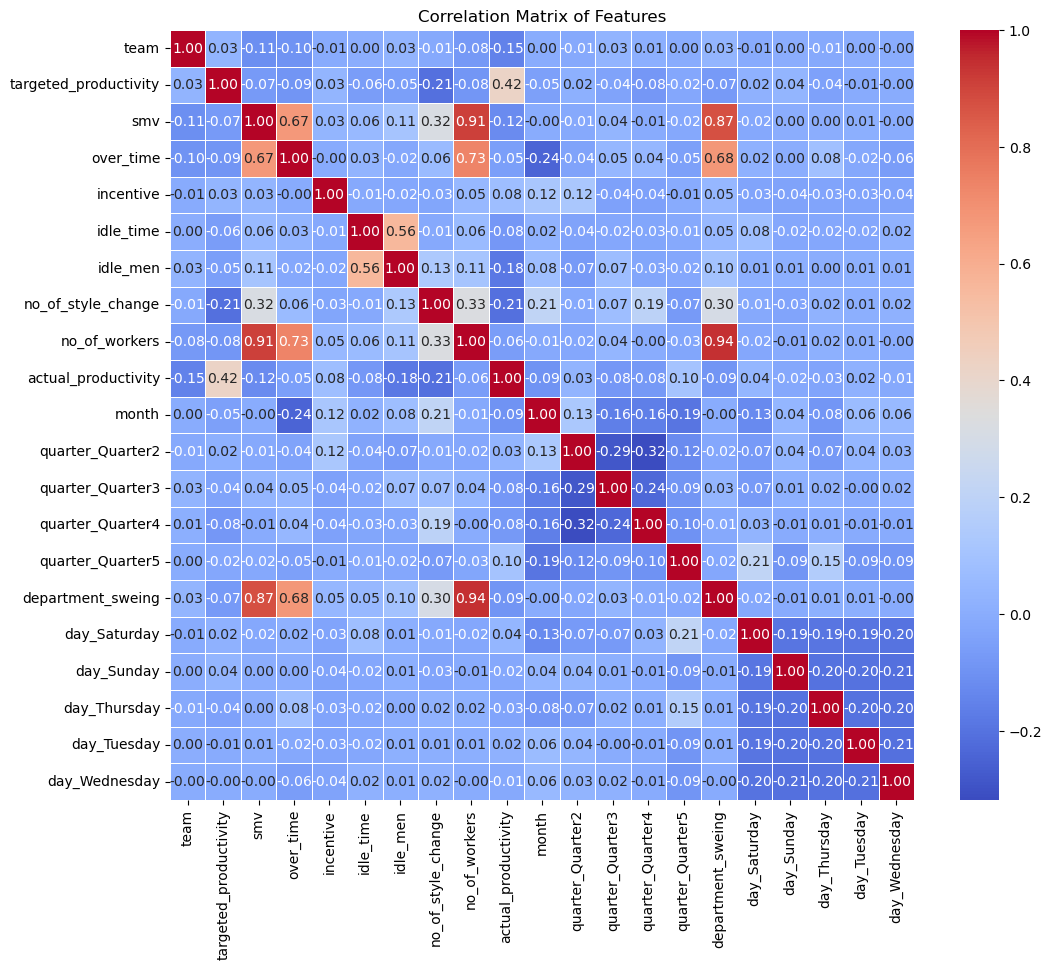


Correlation with 'actual_productivity':
actual_productivity      1.000000
targeted_productivity    0.421594
quarter_Quarter5         0.102019
incentive                0.076538
day_Saturday             0.041539
quarter_Quarter2         0.030805
day_Tuesday              0.019600
day_Wednesday           -0.012172
day_Sunday              -0.016808
day_Thursday            -0.031875
over_time               -0.054206
no_of_workers           -0.057991
quarter_Quarter4        -0.076275
quarter_Quarter3        -0.080219
idle_time               -0.080851
department_sweing       -0.087624
month                   -0.092914
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64


In [137]:
# Check if dataset is loaded and it has the 'actual_productivity' column
if df is not None and 'actual_productivity' in df.columns:

    # Create a correlation matrix (only for numeric columns)
    correlation_matrix = df.corr(numeric_only=True)

    # Plotting the correlation matrix using a heatmap
    plt.figure(figsize=(12, 10))  # Set the size of the heatmap
    sns.heatmap(
        correlation_matrix,     # The data to visualize
        annot=True,             # Show the correlation values inside the boxes
        cmap='coolwarm',        # Color style (blue to red)
        fmt=".2f",              # Show 2 decimal places
        linewidths=0.5          # Add lines between the boxes
    )
    plt.title('Correlation Matrix of Features')  # Title of the heatmap
    plt.show()  # Display the plot

    # Print how much each column is related to 'actual_productivity'
    print("\nCorrelation with 'actual_productivity':")
    print(correlation_matrix['actual_productivity'].sort_values(ascending=False))

# If 'actual_productivity' is missing
elif df is not None:
    print("\n'actual_productivity' column not found for correlation analysis.")

# If dataset is not loaded
else:
    print("\nSkipping correlation analysis as dataset failed to load.")


In [138]:
#Splitting Data into Train and Test

In [139]:
from sklearn.model_selection import train_test_split

# Split only if data is loaded and target column exists
if df is not None and 'actual_productivity' in df.columns:
    
    # Features (X): all columns except target
    X = df.drop('actual_productivity', axis=1)
    
    # Target (y): what we want to predict
    y = df['actual_productivity']

    # Split data: 80% for training, 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Show how many rows are in each set
    print("Training features:", X_train.shape)
    print("Testing features:", X_test.shape)
    print("Training labels:", y_train.shape)
    print("Testing labels:", y_test.shape)

else:
    print("Data or target column not found. Can't split.")


Training features: (957, 20)
Testing features: (240, 20)
Training labels: (957,)
Testing labels: (240,)


In [140]:
# Linear Regression Model
if X_train is not None:
    # Step 1: Create the model
    model_lr = LinearRegression()

    # Step 2: Train the model using training data
    model_lr.fit(X_train, y_train)

    # Step 3: Predict output for test data
    predictions = model_lr.predict(X_test)

    # Step 4: Measure how good the predictions are
    mae = mean_absolute_error(y_test, predictions)  # Average error
    mse = mean_squared_error(y_test, predictions)   # Square of errors
    r2_lr = r2_score(y_test, predictions)# Accuracy score

    # Step 5: Show results
    print("Linear Regression Results:")
    print("MAE:", round(mae, 4))
    print("MSE:", round(mse, 4))
    print("R2 Score:", round(r2_lr, 4))
else:
    print("Training data not found.")


Linear Regression Results:
MAE: 0.109
MSE: 0.022
R2 Score: 0.1715


In [141]:
# Train and evaluate a Random Forest model
if X_train is not None:
    print("\n--- Random Forest Model ---")

    # Step 1: Create the Random Forest Regressor
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Step 2: Train the model using training data
    model_rf.fit(X_train, y_train)

    # Step 3: Predict output using test data
    predictions = model_rf.predict(X_test)

    # Step 4: Measure how good the model is
    mae = mean_absolute_error(y_test, predictions)  # Average error
    mse = mean_squared_error(y_test, predictions)   # Square of errors
    r2_rf = r2_score(y_test, predictions)              # Accuracy score (closer to 1 is better)

    # Step 5: Show the results
    print("Random Forest Results:")
    print("MAE:", round(mae, 4))
    print("MSE:", round(mse, 4))
    print("R2 Score:", round(r2_rf, 4))
else:
    print("Training data not found. Skipping Random Forest.")



--- Random Forest Model ---
Random Forest Results:
MAE: 0.0705
MSE: 0.0138
R2 Score: 0.4816


In [142]:
# Train and evaluate an XGBoost model
if X_train is not None:
    print("\n--- XGBoost Model ---")

    # Step 1: Create the XGBoost Regressor
    model_xgb = xgb.XGBRegressor(
        objective='reg:squarederror',  # This tells the model to use squared error for regression
        n_estimators=100,              # Number of trees to use
        random_state=42                # Ensures results are the same every time
    )

    # Step 2: Train the model using the training data
    model_xgb.fit(X_train, y_train)

    # Step 3: Predict the test data using the trained model
    predictions = model_xgb.predict(X_test)

    # Step 4: Evaluate the model's performance
    mae = mean_absolute_error(y_test, predictions)  # Average absolute difference between prediction and actual
    mse = mean_squared_error(y_test, predictions)   # Average of squared errors
    r2_xgb = r2_score(y_test, predictions)              # How well model fits (1 = perfect)

    # Step 5: Display the results
    print("XGBoost Results:")
    print("MAE:", round(mae, 4))
    print("MSE:", round(mse, 4))
    print("R2 Score:", round(r2_xgb, 4))

else:
    print("Training data not available — skipping XGBoost.")



--- XGBoost Model ---
XGBoost Results:
MAE: 0.0757
MSE: 0.0169
R2 Score: 0.3649


In [143]:
#Compare Models and Save the Best Model

In [144]:

# Check if training data was created earlier
if X_train is not None:
    print("\n--- Model Comparison ---")

    # Step 1: Store R2 scores from each model if available, or set -inf (lowest possible) if not found
    r2_scores = {
        "Linear Regression": locals().get('r2_lr', -np.inf),
        "Random Forest": locals().get('r2_rf', -np.inf),
        "XGBoost": locals().get('r2_xgb', -np.inf)
    }

    # Step 2: Print the R2 scores of all models (or "Not computed" if not available)
    for name, score in r2_scores.items():
        if score != -np.inf:
            print(f"{name} R2: {score:.4f}")  # Show R2 score
        else:
            print(f"{name} R2: Not computed")  # Score not available

    # Step 3: Set up variables to store the best model and its R2 score
    best_model = None
    best_r2 = -np.inf  # Start with the lowest possible value
    model_name = ""    # Placeholder for best model name

    # Step 4: Compare R2 scores and find which model is best
    if 'model_lr' in locals() and r2_scores["Linear Regression"] > best_r2:
        best_r2 = r2_scores["Linear Regression"]
        best_model = model_lr
        model_name = "Linear Regression"

    if 'model_rf' in locals() and r2_scores["Random Forest"] > best_r2:
        best_r2 = r2_scores["Random Forest"]
        best_model = model_rf
        model_name = "Random Forest"

    if 'model_xgb' in locals() and r2_scores["XGBoost"] > best_r2:
        best_r2 = r2_scores["XGBoost"]
        best_model = model_xgb
        model_name = "XGBoost"

    # Step 5: If a model was selected as best, save it to a file
    if best_model is not None:
        print(f"\nBest Model: {model_name} (R2 Score = {best_r2:.4f})")

        # Define paths where model and column names will be saved
        model_path = os.path.join("..", "gwp.pkl")             # For model
        columns_path = os.path.join("..", "model_columns.pkl") # For feature/column names

        try:
            # Save the model object to a file using pickle
            with open(model_path, 'wb') as f:
                pickle.dump(best_model, f)
            print(f"Model saved as {model_path}")

            # Save the column names (used to train the model)
            with open(columns_path, 'wb') as f:
                pickle.dump(X_train.columns.tolist(), f)
            print(f"Model column names saved as {columns_path}")

        except Exception as e:
            # Handle file writing errors
            print("Error saving model or columns:", e)
            print("Check file permissions or folder paths.")

    else:
        # If no model had valid R2 scores, we can't save anything
        print("No model was selected or trained. Cannot save.")

else:
    # If training data wasn't available at all, skip everything
    print("Training data (X_train) not available. Skipping model comparison and saving.")



--- Model Comparison ---
Linear Regression R2: 0.1715
Random Forest R2: 0.4816
XGBoost R2: 0.3649

Best Model: Random Forest (R2 Score = 0.4816)
Model saved as ..\gwp.pkl
Model column names saved as ..\model_columns.pkl
